This notebook implements the full working process to deal with different chains and compare the results.

In [10]:
import os, sys
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import yaml

# Define chain folder
chain_dir = os.path.join(os.getcwd(), 'chains/perlmutter/')

from getdist import loadMCSamples, plots, mcsamples, MCSamples
from python_scripts.prior import *

#### 1. Prior Sampling using the `prior` module
Details on the arguments of the `prior` class:
- `root_dir`: the directory containing the specific text file(s) used to build the MCSamples chain.
- `chain_name`: the name (excluding the extension) of the chain file(s), e.g. */YYYY-MM-DD_nsteps_*.

In order to get the nuisance parameter's prior, remember to copy the `.yaml` configuration file given by PyBird inside the chain folder! Here you have to set the argument:
- `config_name`: the name (excluding the extension) of the configuration file, e.g. */boss_pk_wc*.

In [11]:
posterior = loadMCSamples(file_root=chain_dir+'/eftboss_wc_std/2023-12-04_10000_', settings={'ignore_rows':0.3})
posterior.name_tag = 'BOSS WC + BBN'

# Initialize the prior chains
prior = priorChain(root_dir=chain_dir+'/eftboss_wc_std', chain_name='/2023-12-04_10000_')

/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__8.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__4.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__6.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__7.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__2.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__5.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__3.txt
/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/2023-12-04_10000__1.txt
Removed 0.3 as burn in


In [12]:
# We will remove the burn-in fraction later, after gathering all the needed priors 
cosmo_prior = prior.get_cosmo_prior(ignore_rows=0.)
cosmo_prior.name_tag = 'BOSS WC + BBN Prior'

Removed no burn in


Fixed Parameter Limits: {'omega_cdm': (0.08, 0.16), 'h': (0.635, 0.715), 'ln10^{10}A_s': (2.644, 3.444), 'n_s': (0.765, 1.165), 'b1_hN': (0.0, 4.0), 'c2_hN': (-10.0, 10.0), 'b1_hS': (0.0, 4.0), 'c2_hS': (-10.0, 10.0), 'b1_lN': (0.0, 4.0), 'c2_lN': (-10.0, 10.0), 'b1_lS': (0.0, 4.0), 'c2_lS': (-10.0, 10.0)}


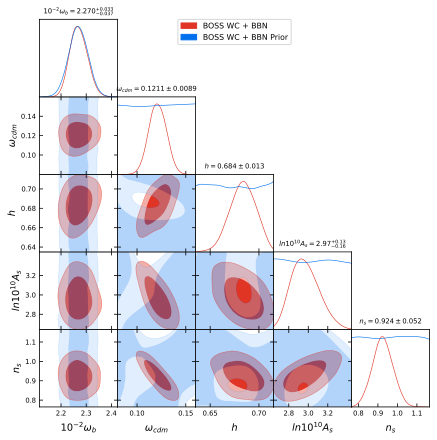

In [13]:
# Plotting
g = plots.get_subplot_plotter(width_inch=7)
g.settings.alpha_filled_add = 0.3
g.triangle_plot([posterior, cosmo_prior], cosmo_prior.getParamNames().list(), title_limit=1,
                filled=True,
                param_limits=prior.get_param_limits());

Now add the derived and nuisance parameters to the prior distribution and plot everything together before analyzing the results using Tensiometer. The derived parameters' prior distributions rely on the cosmological ones, therefore calling the `.get_dv_prior()` method will automatically run `.get_cosmo_prior()` unless you have already done it.\
For the *nuisance* parameters, the `.get_nuisance_prior()` method outputs an independent prior chain: you can join the *derived+cosmo* prior by calling `.get_dv_prior()` to the nuisance prior using GetDist.

Notice that the chain files already contain the correct number of samples. 

In [14]:
prior = priorChain(root_dir=chain_dir+'/eftboss_wc_std', chain_name='/2023-12-04_10000_')
#cosmo_prior = prior.get_dv_prior(include_class=True)
#cosmo_prior.saveAsText(root='chains/perlmutter/eftboss_wc_std/cosmo_prior_')

In [15]:
cosmo_prior = loadMCSamples(file_root=chain_dir+'/eftboss_wc_std/cosmo_prior_', 
                            settings={'ignore_rows':0., 'smooth_scale_1D':-1, 'smooth_scale_2D':-1})
cosmo_prior.name_tag = 'BOSS WC + BBN Prior'
# Check completeness
print(f'List of \"cosmological\" parameters: {cosmo_prior.getParamNames().getRunningNames()}')
print(f'     List of \"derived\" parameters: {cosmo_prior.getParamNames().getDerivedNames()}')

/home/errez/code/montepython_tutorial/chains/perlmutter//eftboss_wc_std/cosmo_prior_.txt
Removed no burn in
List of "cosmological" parameters: ['omega_b', 'omega_cdm', 'h', 'ln10^{10}A_s', 'n_s']
     List of "derived" parameters: ['Omega_m', 'A_s', 'sigma8']


In [16]:
# Plotting
g = plots.get_subplot_plotter(width_inch=9)
g.settings.alpha_filled_add = 0.3
g.settings.title_limit_fontsize = 0.8
g.triangle_plot([posterior, cosmo_prior], cosmo_prior.getParamNames().list(), title_limit=1,
                filled=True,
                param_limits=prior.get_param_limits());

Loading input file.
Fixed Parameter Limits: {'omega_cdm': (0.08, 0.16), 'h': (0.635, 0.715), 'ln10^{10}A_s': (2.644, 3.444), 'n_s': (0.765, 1.165), 'b1_hN': (0.0, 4.0), 'c2_hN': (-10.0, 10.0), 'b1_hS': (0.0, 4.0), 'c2_hS': (-10.0, 10.0), 'b1_lN': (0.0, 4.0), 'c2_lN': (-10.0, 10.0), 'b1_lS': (0.0, 4.0), 'c2_lS': (-10.0, 10.0)}
